In [1]:
import cv2
import pandas as pd
import patchesMethods as pm

In [4]:
def loadDataBase():
    #Desktop I3
    TRAIN_CSV = r'D:\_0Luciano\_0PHD\datasets\tgs-salt\train1090.csv'
    IMAGES_DIR = r'D:\_0Luciano\_0PHD\datasets\tgs-salt\train\images'
    MASK_DIR = r'D:\_0Luciano\_0PHD\datasets\tgs-salt\masks10-90'

    # ES00004605
    TRAIN_CSV = r'G:\_phd\dataset\tgs-salt\saltMaskOk.csv'
    IMAGES_DIR= r'G:\_phd\dataset\tgs-salt\train\images' 
    MASK_DIR = r'G:\_phd\dataset\tgs-salt\train\masks'

    df_train = pd.read_csv(TRAIN_CSV)
    fileNamesList = df_train.iloc[0:100,0]
    imagesList = pm.loadImages(IMAGES_DIR, fileNamesList)
    masksList  = pm.loadImages(MASK_DIR,  fileNamesList)
    patchesDB = pm.buildPatchesDB(masksList, imagesList)
    return patchesDB

In [5]:
patchesDB = loadDataBase()    
img = pm.searchNearestKey(patchesDB, 75)


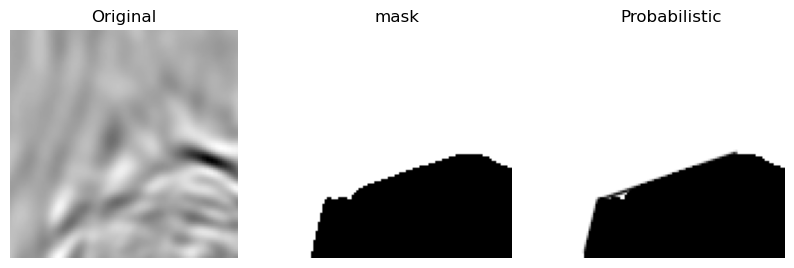

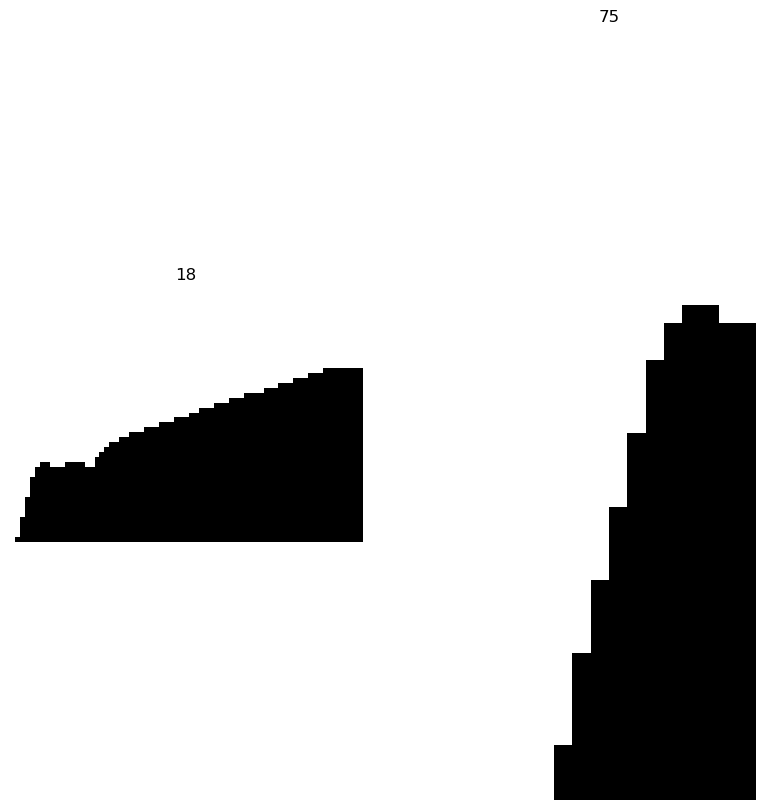

In [6]:
sample_path="../tgs_salt/0bdd44d530.png"
mask_path  ="../tgs_salt/0bdd44d530Mask.png"

original = cv2.imread(sample_path)
mask = cv2.imread(mask_path,0)
patches, linesImage = pm.probHough(mask, mask, tresh = 20, minPoints=15, maxGap=10, sort=False)
pm.show3Images(original, mask,  linesImage )

pm.dispArrayImages(patches)

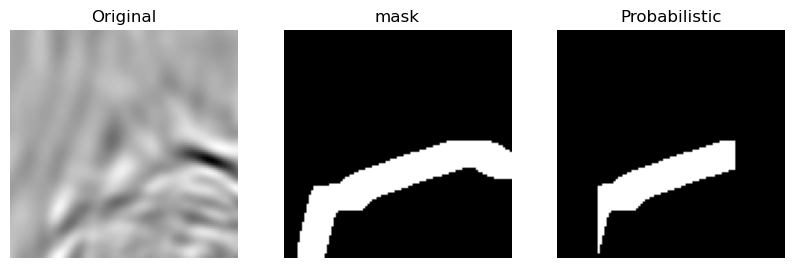

In [10]:
dilated_edge, zone0, zone1, fullmask = pm.create_Masks(mask)
generat_mask = dilated_edge

if patches is not None:
    p = patches[0]
    angle = p.angle
    line = p.line
    origRGBSample = pm.searchNearestKey(patchesDB, angle)
    x1,y1,x2,y2 = line
    #set 0 to generat_mask columns from y1 to y2
    patchMask = generat_mask.copy()

if x1 < x2:
    patchMask[:,0:x1] = 0
    patchMask[:,x2:] = 0
else:
    patchMask[:,0:x2] = 0
    patchMask[:,x1:] = 0

pm.show3Images(original, generat_mask
,  patchMask )